# Peer Grade Week 4 Assignment: The Battle of Neighborhoods

# Table of contents
<ol>
<li><a href='### Introduction'>Introduction/Business Problem</a></li>
<ol><li><a href='#### Business Problem'>Business Problem</a></li>
<li><a href='#### Similarity Analysis Problem'>Similarity Analysis Problem</a></li></ol>
<li><a href='### Data Collection and Data Wrangling'>Data Collection and Data Wrangling</a></li>
<ol><li><a href='#### New York Data'>New York Data</a></li>
<li><a href='#### Toronto Data'>Toronto Data</a></li></ol>
<li><a href='### Data Analysis'>Data Analysis</a></li>
<ol><li><a href='#### Finding common venues in New York and Toronto'>Finding common venues in New York and Toronto</a></li>
<li><a href='#### Analyze New York Data'>Analyze New York Data</a></li>
<li><a href='#### Analyze Toronto Data'>Analyze Toronto Data</a></li></ol>
<li><a href='### Calculating Similar Neighborhood'>Calculating Similar Neighborhood</a></li>
<ol><li><a href='#### Matrix Multiplication'>Matrix Multiplication</a></li>
<li><a href='#### Validate Matched Locations'>Validate Matched Locations</a></li></ol>
</ol>

### Introduction/Business Problem

#### Business Problem
<p>People needs to migrate from a current city to a new city due to new job opportunities. Let's say a person got an interesting job offer from a different city , say New York and he/she lives in Downtown Toronto currently. It would be really helpful to seek a place to live which is most similar to the current living location of that person.</p>
<p>Some of the popular location categories, one might look for in the proximity of a living area are grocery stores, colleges or/and schools, parks, restaurants, coffee-shops, hospitals and other community areas like religious places, community halls, libraries, etc. So I’ll find out what are borough-neighborhoods that are very similar to a person's current location.</p>
<p>
This information can help the person decide on which neighborhood he/she would love to live in once he/she moves to New York after accepting a new job offer.
    </p>

#### Similarity Analysis Problem
<p>
    How do we compare two cities New York and Toronto and measure similarity? Foursquare offers venue category to each venue. We can use this information to count the number of venues for each category and compare it with all neighborhoods of New York.</p>

### Data Collection and Data Wrangling

In [1]:
!pip install wget
!pip install matplotlib
!pip install matplotlib-venn
!pip install requests

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files
import numpy as np # library to handle data in a vectorized manner
import wget #to import csv file that has latitude and longitude of a location
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # map rendering library
from bs4 import BeautifulSoup # to extract tabular information from html page
import matplotlib.pyplot as plt #library for plotting data
from matplotlib_venn import venn2 #to plot venn diagram for common locations
from scipy.spatial import distance #to calculate cosine similarity between 2 locations 
from sklearn.cluster import KMeans #sklearn library to cluster data using KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


#### New York Data
Here, we need to retrieve details of neighborhoods of New York city. Also, all venues details are also required to compare two cities.
##### Data Wrangling
<p>Below steps will be followed to clean the data from cities datasets</p>

<p>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. Split the neighborhoods as one per line.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.</p>
<p>Step 1: The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.</p>

<p>Step 2: Use geopy library to get the latitude and longitude values of New York City. Using Geolocator or the csv file provided, we can get the Latitude, Longitude of each Neighborhood.</p>

<p>Step 3: By passing the latitude and longitude into Foursquare API, we can get venue information like 
    <ul><li>Neighborhood Latitude,</li><li> Neighborhood Longitude,</li><li> Venue,</li><li> Venue Latitude,</li><li> Venue Longitude,</li><li> Venue Category.</li></p>

##### Load and explore the data
<p>The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.</p>

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork_neighborhoods = pd.DataFrame(columns=column_names)

# loop the data to fill in the dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_neighborhoods = newyork_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
newyork_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(newyork_neighborhoods['Borough'].unique()),
        newyork_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


##### Step 2
Step 2: Use geopy library to get the latitude and longitude values of New York City. Using Geolocator or the csv file provided, we can get the Latitude, Longitude of each Neighborhood.

In [6]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
newyork_latitude = location.latitude
newyork_longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(newyork_latitude, newyork_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [7]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(newyork_neighborhoods['Latitude'], newyork_neighborhoods['Longitude'], newyork_neighborhoods['Borough'], newyork_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

##### Step 3
Step 3: By passing the latitude and longitude into Foursquare API, we can get venue information like 
    <ul><li>Neighborhood Latitude,</li><li> Neighborhood Longitude,</li><li> Venue,</li><li> Venue Latitude,</li><li> Venue Longitude,</li><li> Venue Category.</li>

#### Define Foursquare Credentials and Version


In [8]:
CLIENT_ID = 'YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05' # your Foursquare ID
CLIENT_SECRET = 'YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05
CLIENT_SECRET:YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI


##### Now, let's get the top 100 venues that are in New York city within a radius of 500 meters.


First, let's create the GET request URL. Name your URL **url**.

In [9]:
# type your answer here
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    newyork_latitude, 
    newyork_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05&client_secret=YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI&v=20180605&ll=40.7127281,-74.0060152&radius=500&limit=100'

Send the GET request and examine the resutls


In [10]:
newyork_results = requests.get(url,"none").json()
newyork_results

{'meta': {'code': 200, 'requestId': '60d223d41f121936c27740c4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 88,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'label

From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe.

In [12]:
venues = newyork_results['response']['groups'][0]['items']
# venues = newyork_results['response']['venues']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
2,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
3,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734
4,Takahachi Bakery,Bakery,40.713653,-74.008804


And how many venues were returned by Foursquare?

In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

88 venues were returned by Foursquare.


##### Let's create a function to repeat the same process to all the neighborhoods in New York


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Now write the code to run the above function on each neighborhood and create a new dataframe called _newyork_venues_.


In [15]:
# type your answer here
newyork_venues = getNearbyVenues(names=newyork_neighborhoods['Neighborhood'],
                                   latitudes=newyork_neighborhoods['Latitude'],
                                   longitudes=newyork_neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

#### Let's check the size of the resulting dataframe


In [16]:
print(newyork_venues.shape)
print("There are a total of "+ str(len(newyork_venues["Venue Category"].unique()))+" unique venue categories and "+ str(newyork_venues["Venue"].count()) +" venues in New York City")
newyork_venues.head()

(9495, 7)
There are a total of 434 unique venue categories and 9495 venues in New York City


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place


Let's check how many venues were returned for each neighborhood


In [17]:
newyork_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,29,29,29,29,29,29
Annadale,11,11,11,11,11,11
Arden Heights,5,5,5,5,5,5
Arlington,4,4,4,4,4,4
Arrochar,16,16,16,16,16,16
Arverne,21,21,21,21,21,21
Astoria,89,89,89,89,89,89
Astoria Heights,12,12,12,12,12,12
Auburndale,21,21,21,21,21,21


#### Toronto Data
Here, we need to retrieve details of neighborhoods of Toronto city. Also, all venues details are also required to compare two cities.
##### Data Wrangling
<p>Below steps will be followed to clean the data from cities datasets</p>

<p>Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. Split the neighborhoods as one per line.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.</p>
<p>Step 1: The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.</p>

<p>Step 2: Use geopy library to get the latitude and longitude values of New York City. Using Geolocator or the csv file provided, we can get the Latitude, Longitude of each Neighborhood.</p>

<p>Step 3: By passing the latitude and longitude into Foursquare API, we can get venue information like 
    <ul><li>Neighborhood Latitude,</li><li> Neighborhood Longitude,</li><li> Venue,</li><li> Venue Latitude,</li><li> Venue Longitude,</li><li> Venue Category.</li></p>



##### Step 1
Step 1: The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.
##### Load and explore the data
<p>The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.</p>

In [18]:
import re
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
from bs4 import BeautifulSoup

soup = BeautifulSoup(website_url,'lxml')
table=soup.find('table')

column_names = ['PostalCode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)
content = soup.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

# Read data from table and copy in dataframe

for tr in table.find_all('tr'):
    for td in tr.find_all('td'):
        data = td.text.strip('\n')
        postcode = data[0:3]
        data = data.replace(postcode,'')
        temp = re.findall('[\w+ \'\.]+',data)
        borough =temp[0]
        for neighborhood in temp[1:len(temp)]:
            neighborhood=neighborhood.lstrip(" ").rstrip(" ")
            toronto = toronto.append({'PostalCode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
toronto['Borough']=toronto['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A','East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business','EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto','MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
toronto = toronto[toronto['Borough']!='Not assigned']

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
for idx,row in toronto.iterrows():
    if row['Neighborhood'] == "":
        toronto.loc[idx]['Neighborhood']=row['Borough']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
toronto_neighbors = toronto.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
toronto_neighbors

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [19]:
import csv

toronto_geocsv = 'https://cocl.us/Geospatial_data'
geocsv_data = pd.read_csv(toronto_geocsv)#.set_index("Postal Code")
geocsv_data = geocsv_data.rename(columns={'Postal Code':'PostalCode'})
geocsv_data.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
toronto_neighbors_geocsv_data = pd.merge(toronto_neighbors,geocsv_data,on='PostalCode')
toronto_neighbors_geocsv_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [21]:
print(toronto_neighbors_geocsv_data.shape)

(103, 5)


Use geopy library to get the latitude and longitude values of Toronto. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent Toronto_explorer, as shown below.

In [22]:
address = 'Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")
toronto_location = geolocator.geocode(address)
toronto_latitude = location.latitude
toronto_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(toronto_latitude, toronto_longitude))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods superimposed on top.

In [23]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighbors_geocsv_data['Latitude'], toronto_neighbors_geocsv_data['Longitude'], toronto_neighbors_geocsv_data['Borough'], toronto_neighbors_geocsv_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Select only boroughs that contain the word Toronto.

In [24]:
toronto_data = toronto_neighbors_geocsv_data[toronto_neighbors_geocsv_data['Borough'].str.contains("Toronto")].reset_index(drop=True)
print(toronto_data.shape)
toronto_data

(39, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106
2,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
3,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
4,M4M,East Toronto,Studio District,43.659526,-79.340923
5,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
6,M4P,Central Toronto,Davisville North,43.712751,-79.390197
7,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
8,M4S,Central Toronto,Davisville,43.704324,-79.388790
9,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [25]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

The Beaches
The Danforth  East
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, West
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Enclave of M5E
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction S

In [26]:
print(toronto_venues.shape)
toronto_venues.head()

(1493, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
3,The Beaches,43.676357,-79.293031,Skaut Design,43.680263,-79.290581,Construction & Landscaping
4,The Danforth East,43.685347,-79.338106,The Path,43.683923,-79.335007,Park


Let's check how many venues were returned for each neighborhood

In [27]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,46,46,46,46,46,46
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,66,66,66,66,66,66
Christie,14,14,14,14,14,14
Church and Wellesley,70,70,70,70,70,70
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33
Davisville North,9,9,9,9,9,9


Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print("There are a total of "+ str(len(toronto_venues["Venue Category"].unique()))+" unique venue categories and "+ str(toronto_venues["Venue"].count()) +" venues in Toronto")

There are a total of 215 unique venue categories and 1493 venues in Toronto


### Data Analysis
Analyze each neighborhood and cluster each neighborhood in each city.
let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category. Identify 10 most common venue categories in each Neighborhood.

#### Finding common venues in New York and Toronto
<p>Given a neighbourhood in New York, if a similar neighborhood needs to be found in Toronto, we need to consider all the similar venue categories to selected burough of New York and Toronto before grouping.
    </p>

In [29]:
set_toronto_venues = set (toronto_venues["Venue Category"])
set_newyork_venues = set (newyork_venues["Venue Category"])
set_common_venues = set_newyork_venues.intersection(set_toronto_venues)


common_venues_count = len(set_common_venues)
newyork_unique = len(set_newyork_venues) - common_venues_count
toronto_unique = len(set_toronto_venues) - common_venues_count
print("Toronto venues common to New York: {0} \nNew York unique venue that will be discarded: {1}\nToronto unique venues that will be discarded: {2}".format(common_venues_count,newyork_unique,toronto_unique))

Toronto venues common to New York: 195 
New York unique venue that will be discarded: 239
Toronto unique venues that will be discarded: 20


In [30]:
print(set_common_venues)

{'Gaming Cafe', 'Furniture / Home Store', 'Department Store', 'Frozen Yogurt Shop', 'Flower Shop', 'Seafood Restaurant', 'Shoe Store', 'Modern European Restaurant', 'Chocolate Shop', 'Gym Pool', 'Cocktail Bar', 'Juice Bar', 'Cajun / Creole Restaurant', 'Candy Store', 'History Museum', 'Cheese Shop', 'Organic Grocery', 'Falafel Restaurant', 'Brazilian Restaurant', 'Steakhouse', 'Pharmacy', 'Lake', 'Gluten-free Restaurant', 'Gym', 'Sushi Restaurant', 'Chinese Restaurant', 'Sports Bar', 'Malay Restaurant', 'Skate Park', 'Café', 'Sculpture Garden', 'Market', 'Middle Eastern Restaurant', 'Colombian Restaurant', 'Mediterranean Restaurant', 'Adult Boutique', 'Bakery', 'Eastern European Restaurant', 'Liquor Store', 'Lingerie Store', 'Gay Bar', 'Caribbean Restaurant', 'Performing Arts Venue', 'Scenic Lookout', 'Beach', "Men's Store", 'Sandwich Place', 'College Arts Building', 'Sake Bar', 'Arts & Crafts Store', 'Jewelry Store', 'Garden Center', 'Burrito Place', 'Hotel', 'Bagel Shop', 'Dance Stud

Plotting a Venn diagram to visualize the similar venues

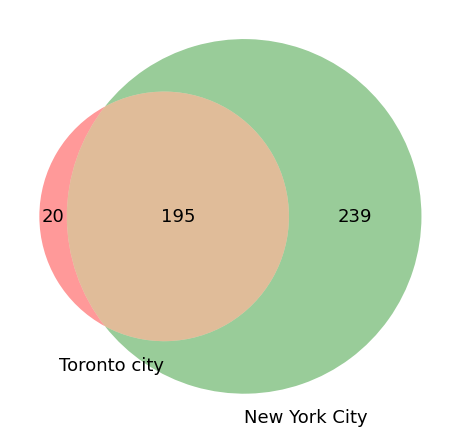

In [31]:
plt.figure(figsize = (8,8))
out = venn2(subsets = (set_toronto_venues,set_newyork_venues), set_labels = ['Toronto city', 'New York City'])
for text in out.set_labels:
    text.set_fontsize(18)
for text in out.subset_labels:
    text.set_fontsize(18)
plt.show()

In [32]:
toronto_clean= toronto_venues[toronto_venues["Venue Category"].isin(set_common_venues)]
newyork_clean= newyork_venues[newyork_venues["Venue Category"].isin(set_common_venues)]

print("Total venues in Toronto now: {0}".format(toronto_clean.shape[0]))
print("Total venues in New York City now: {0}".format(newyork_clean.shape[0]))

Total venues in Toronto now: 1460
Total venues in New York City now: 8037


#### Analyze New York Data

In [33]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_clean[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_clean['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]
newyork_grouped = newyork_onehot.groupby('Neighborhood').sum().reset_index()
newyork_grouped.head()
#merge the data with latitude longitiude of neighborhood and borough and zip code
newyork_merged =newyork_neighborhoods.join(newyork_grouped.set_index('Neighborhood'), on='Neighborhood')
newyork_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Bronx,Wakefield,40.894705,-73.847201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [34]:
newyork_grouped_bit = newyork_onehot.groupby('Neighborhood').max().reset_index()
newyork_grouped_bit.head()
#merge the data with latitude longitiude of neighborhood and borough and zip code
newyork_merged_bit =newyork_neighborhoods.join(newyork_grouped_bit.set_index('Neighborhood'), on='Neighborhood')
print(newyork_merged_bit.shape)
newyork_merged_bit.head()


(306, 198)


,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Bronx,Wakefield,40.894705,-73.847201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Analyze Toronto Data

In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_clean[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_clean['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped.head()
#merge the data with latitude longitiude of neighborhood and borough and zip code
toronto_merged =toronto_data.join(toronto_grouped.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0

In [36]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,

In [39]:
toronto_onehot.shape

(1493, 215)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [40]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.065217,0.000000,0.000000,0.00,0.021739,0.021739,0.000000,0.043478,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.021739,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.065217,0.000000,0.000000,0.00,0.00,0.021739,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0

Let's confirm the new size

In [41]:
toronto_grouped.shape

(39, 215)

In [42]:
#merge the data with latitude longitiude of neighborhood and borough and zip code
toronto_merged = toronto_data.join(toronto_grouped.set_index('Neighborhood'), on='Neighborhood')
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.25,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00

In [43]:
toronto_grouped_bit = toronto_onehot.groupby('Neighborhood').max().reset_index()
toronto_grouped_bit.head()
#merge the data with latitude longitiude of neighborhood and borough and zip code
toronto_merged_bit =toronto_data.join(toronto_grouped_bit.set_index('Neighborhood'), on='Neighborhood')
toronto_merged_bit.head(5)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [44]:
print(toronto_merged_bit.shape)
print(newyork_merged_bit.shape)


(39, 219)
(306, 198)


### Calculating Similar Neighborhood

<p>There are few ways to find out similar neighborhoods:
<ol>
<li>Euclidean distance or Cosine Similarityimage.pngThis approach is used to calculate distance between vectors represented by 1-d array.
    $$d_{(x,y)} = \sqrt{\sum \limits_{j=1}^{J} (x_j-y_j)^2}$$</li>
<li>Matrix Multiplication
This appoach will be used to amplify similar venue categories and discard dissimilar venue categories when comparing 2 neighborhoods</li>
<p>For our problem, we need to find New York neighborhoods with maximum maching categories with given neighborhood in Toronto and discard dissimilar venue categories</p>

In [45]:
# declare the index, latitude, longitude of the location we want to find the similarity in New York
t_index = toronto_merged.loc[(toronto_merged['Borough'] == 'Central Toronto') 
                & (toronto_merged['Neighborhood'] == 'Davisville')].index.values.astype(int)[0]
t_lat = toronto_merged.loc[t_index]['Latitude']
t_lon = toronto_merged.loc[t_index]['Longitude']
print('Toronto Index    :{}\nDavisville Latitude : {}\nDavisville Longitude: {}'.format(t_index, t_lat, t_lon))

Toronto Index    :8
Davisville Latitude : 43.7043244
Davisville Longitude: -79.3887901


#### Matrix Multiplication

<p>Steps to get matching locations:</p>
<ol>
<li>isolate columns from dataframes to get common venue categories columns</li>
<li>multiply given index of toronto with transpose of ny data values</li>
<li>sort the dot product of matrices to get most matched</li>
<li>save the matching locations into a dataframe</li>
</ol>

In [79]:
#isolate common columns to form a matrix
newyork_data = newyork_merged_bit.iloc[:,3:]
toronto_data = toronto_merged_bit.iloc[:,24:]

#get top 5 similar neighborhoods matched for the location
n_most_similar = 5

# store only the values of the dataframes
newyork_values = newyork_data.values
toronto_values = toronto_data.values

# convert all NaN values to 0 in both dataframes
where_are_NaNs = np.isnan(newyork_values)
newyork_values[where_are_NaNs] = 0

where_are_NaNs = np.isnan(toronto_values)
toronto_values[where_are_NaNs] = 0

In [80]:
# find NY locations matching to given toronto location

matrix_multiplication_array = np.matmul(toronto_values[t_index], newyork_values.T)
#return the index in sorted order (descending)of values, 
#first element correspond to the index of maximum value in a
matches_sorted = np.argsort(-matrix_multiplication_array)[0:n_most_similar] 


#retrieve and store matching locations into a dataframe
matching_locations = newyork_merged.iloc[matches_sorted, :]
print(matching_locations.shape)
matching_locations.head()

(5, 198)


,Borough,Neighborhood,Latitude,Longitude,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
118,Manhattan,East Village,40.727847,-73.982226,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0
86,Brooklyn,Downtown,40.690844,-73.983463,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

#### Validate Matched Locations

<p>Inorder to verify the matched locations, retrieve the 5 top common locations of the matched neighborhoods and see if it matches with given location from Toronto.</p>
<p>Write function to display the top 5 locations of Toronto and New York locations</p>

In [65]:
def print_top_5_venues_in_toronto_neighborhood(hood, num_top_venues=5):
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [66]:
def print_top_5_venues_in_newyork_neighborhood(hood, num_top_venues=5):
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Given location is in Central Toronto, Davisville

In [81]:
print_top_5_venues_in_toronto_neighborhood(toronto_merged.iloc[t_index]["Neighborhood"])
for hood in matching_locations['Neighborhood']:
    print_top_5_venues_in_newyork_neighborhood(hood)

----Davisville----
             venue  freq
0      Pizza Place  0.15
1     Dessert Shop  0.06
2   Sandwich Place  0.06
3  Thai Restaurant  0.06
4              Gym  0.06


----East Village----
                           venue  freq
0                            Bar   5.0
1                       Wine Bar   4.0
2  Vegetarian / Vegan Restaurant   4.0
3              Korean Restaurant   3.0
4                 Ice Cream Shop   3.0


----Downtown----
                venue  freq
0         Coffee Shop   4.0
1  Chinese Restaurant   4.0
2      Sandwich Place   4.0
3        Burger Joint   3.0
4                Bank   3.0


----Boerum Hill----
                 venue  freq
0          Coffee Shop   5.0
1       Sandwich Place   4.0
2                  Bar   4.0
3         Dance Studio   3.0
4  Arts & Crafts Store   3.0


----Bay Ridge----
                venue  freq
0  Italian Restaurant   5.0
1    Greek Restaurant   4.0
2         Pizza Place   4.0
3                 Bar   3.0
4                 Spa   3.0


-

#### Analyze matched locations
<p>Let's analyze the matched neighborhoods by each venue category to the given Toronto city. The person who is moving from Toronto to New York might have priority of venue categories and this analysis below can help determine best matching city in New York.

- Get all venues in Toronto
- get missing venues in each match location in New York
- create a bar chart of toronto and each city
    </p>

In [68]:
if('Neighborhood' in fixed_columns):
    fixed_columns.remove('Neighborhood')
    print('removed')

removed


In [69]:
location = toronto_merged.iloc[t_index]["Neighborhood"]+ ', '+toronto_merged.iloc[t_index]["Borough"]


df1 = toronto_merged[fixed_columns].iloc[[t_index]].T
df1.index = df1.index.set_names('Venue Category')
df1.columns = [location]
df1 = df1.reset_index()
df1 = df1.loc[df1[location] > 0].sort_values(by = location, ascending = False )
df1

,Venue Category,"Davisville, Central Toronto"
161,Pizza Place,0.151515
51,Coffee Shop,0.060606
202,Thai Restaurant,0.060606
68,Dessert Shop,0.060606
197,Sushi Restaurant,0.060606
177,Sandwich Place,0.060606
104,Gym,0.060606
33,Brewery,0.030303
147,Movie Theater,0.030303
201,Tennis Court,0.030303


In [70]:
venues_to_match = df1['Venue Category'].values
df2 = matching_locations[venues_to_match].T
d = []
for i in df2.columns.values:
    d.append((i,','.join(df2[i].loc[df2[i] == 0].index.values)))


missing_venues = pd.DataFrame(d, columns=('i', 'missing_venues'))
missing_venues.set_index('i', inplace = True)
missing_venues

,missing_venues
i,
118,"Thai Restaurant,Gym,Brewery,Movie Theater,Tenn..."
86,"Dessert Shop,Sushi Restaurant,Gym,Brewery,Tenn..."
87,"Dessert Shop,Sushi Restaurant,Gym,Brewery,Movi..."
46,"Coffee Shop,Dessert Shop,Gym,Brewery,Movie The..."
129,"Brewery,Movie Theater,Tennis Court,Pharmacy,Pa..."


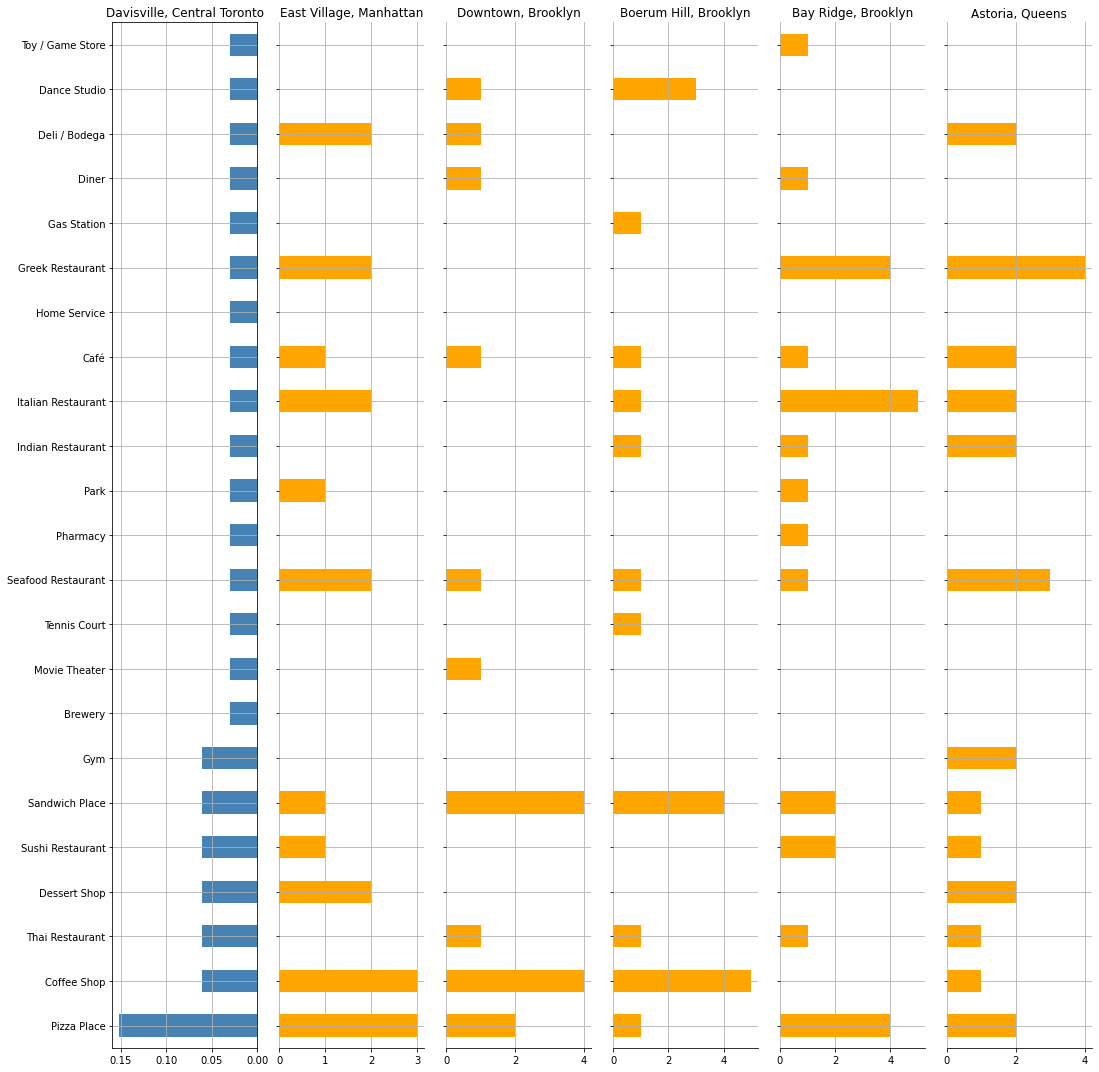

In [71]:
location = toronto_merged.iloc[t_index]["Neighborhood"]+ ', '+toronto_merged.iloc[t_index]["Borough"]

fig = plt.figure()

plot_number = 2

ax1 = fig.add_subplot(181) 
df1.plot(kind='barh',figsize=(20, 15),x = 'Venue Category',  color = 'steelblue',  ax=ax1, legend=False)
ax1.invert_xaxis()
ax1.grid(True)
ax1.set_ylabel('')
ax1.set_title(location)

for col in df2.columns.values:
    dftemp = df2[[col]]
    my_title = newyork_merged.iloc[col]["Neighborhood"]+ ', '+newyork_merged.iloc[col]["Borough"]
    ax = plt.subplot(1, 8, plot_number,  sharey = ax1)
    dftemp.plot(kind='barh',figsize=(20, 15),color = 'orange', ax = ax, legend=False, clip_on=False)
    ax.grid(True)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(my_title)
    plot_number = plot_number + 1

plt.tight_layout()

In [72]:
print("Missing Venue categories")
print(' ')
for borough, neighborhood, i in zip(matching_locations['Borough'],matching_locations['Neighborhood'],matching_locations.index):
    print(borough + ','+ neighborhood + ' - '+str(missing_venues.loc[i]['missing_venues']) )
    print(' ')

Missing Venue categories
 
Manhattan,East Village - Thai Restaurant,Gym,Brewery,Movie Theater,Tennis Court,Pharmacy,Indian Restaurant,Home Service,Gas Station,Diner,Dance Studio,Toy / Game Store
 
Brooklyn,Downtown - Dessert Shop,Sushi Restaurant,Gym,Brewery,Tennis Court,Pharmacy,Park,Indian Restaurant,Italian Restaurant,Home Service,Greek Restaurant,Gas Station,Toy / Game Store
 
Brooklyn,Boerum Hill - Dessert Shop,Sushi Restaurant,Gym,Brewery,Movie Theater,Pharmacy,Park,Home Service,Greek Restaurant,Diner,Deli / Bodega,Toy / Game Store
 
Brooklyn,Bay Ridge - Coffee Shop,Dessert Shop,Gym,Brewery,Movie Theater,Tennis Court,Home Service,Gas Station,Deli / Bodega,Dance Studio
 
Queens,Astoria - Brewery,Movie Theater,Tennis Court,Pharmacy,Park,Home Service,Gas Station,Diner,Dance Studio,Toy / Game Store
 


### Mapping the matched locations
Lets map these New York neighborhoods using folium

In [73]:
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=11)

# set color scheme for the neighborhoods
x = np.arange(n_most_similar)

rainbow = ['red','green','blue','magenta','cyan','darkvoilet','lime']


# add markers to the map
markers_colors = []
for lat, lon, poi, matching_neighborhood in zip(matching_locations['Latitude'], matching_locations['Longitude'], matching_locations['Neighborhood'], x):
    label = folium.Popup(str(poi) + ' Neighborhood ' + str(matching_neighborhood), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[matching_neighborhood-1],
        fill=True,
        fill_color=rainbow[matching_neighborhood-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [74]:
print(x)
for lat, lon, poi, matching_neighborhood in zip(matching_locations['Latitude'], matching_locations['Longitude'], matching_locations['Neighborhood'], x):
    print(lat, lon,poi, matching_neighborhood )

[0 1 2 3 4]
40.727846777270244 -73.98222616506416 East Village 0
40.69084402109802 -73.98346337431099 Downtown 1
40.685682912091444 -73.98374824115798 Boerum Hill 2
40.625801065010656 -74.03062069353813 Bay Ridge 3
40.76850859335492 -73.91565374304234 Astoria 4


### Combine all the above steps into a function call

In [82]:
def drawMap(map_lat,map_lon,n_most_similar,matching_locations):
    map_clusters = folium.Map(location=[map_lat, map_lon], zoom_start=11)


    # set color scheme for the neighborhoods
    x = np.arange(1,n_most_similar+1)

    rainbow = ['red','green','blue','magenta','cyan','darkvoilet','lime']


    # add markers to the map
    markers_colors = []
    for i_lat, i_lon, matching_neighborhood, poi in zip(matching_locations['Latitude'], matching_locations['Longitude'], matching_locations['Neighborhood'], x):
        label = folium.Popup(str(poi+1) + ' Neighborhood ' + str(matching_neighborhood), parse_html=True)
        folium.CircleMarker(
            [i_lat, i_lon],
            radius=5,
            popup=label,
            color=rainbow[poi+1],
            fill=True,
            fill_color=rainbow[poi+1],
            fill_opacity=0.7).add_to(map_clusters)
       
    return map_clusters



def most_similar_borough(current_city, current_borough, current_neigh, n_most_similar):
    
    
    ######### find matched locations #############
    
    
    #isolate common columns to form a matrix
    newyork_data = newyork_merged_bit.iloc[:,3:]
    toronto_data = toronto_merged_bit.iloc[:,24:]
    
    if current_city.lower() == 'New York'.lower():
        curr = newyork_data.values
        find = toronto_data.values
        index = newyork_merged_bit.loc[(newyork_merged_bit['Borough'] == current_borough) 
                        & (newyork_merged_bit['Neighborhood'] == current_neigh)].index.values.astype(int)[0]
        lat = newyork_merged_bit.loc[index]['Latitude']
        lon = newyork_merged_bit.loc[index]['Longitude']
    else:
        curr = toronto_data.values
        find = newyork_data.values
        index = toronto_merged_bit.loc[(toronto_merged_bit['Borough'] == current_borough) 
                & (toronto_merged_bit['Neighborhood'] == current_neigh)].index.values.astype(int)[0]
        lat = toronto_merged_bit.loc[index]['Latitude']
        lon = toronto_merged_bit.loc[index]['Longitude']
    matrix_multiplication_array = np.matmul(curr[index], find.T)
    #return the index in sorted order (descending)of values, 
    #first element correspond to the index of maximum value in a
    matches_sorted = np.argsort(-matrix_multiplication_array)[0:n_most_similar] 

    #retrieve and store matching locations into a dataframe
    if current_city.lower() == 'New York'.lower():
        matching_locations = toronto_merged.iloc[matches_sorted, :]

    else:
        matching_locations = newyork_merged.iloc[matches_sorted, :]


    

    ######## Analysis of matched locations ##########       
    
    if current_city.lower() == 'New York'.lower():
        df1 = newyork_merged[fixed_columns].iloc[[index]].T
    else:
        df1 = toronto_merged[fixed_columns].iloc[[index]].T
        
    df1.index = df1.index.set_names('Venue Category')
    df1.columns = [current_neigh+', '+current_borough]
    df1 = df1.reset_index()
    df1 = df1.loc[df1[current_neigh+', '+current_borough] > 0].sort_values(by = current_neigh+', '+current_borough, ascending = False )

    venues_to_match = df1['Venue Category'].values
    df2 = matching_locations[venues_to_match].T
    d = []
    for i in df2.columns.values:
        d.append((i,','.join(df2[i].loc[df2[i] == 0].index.values)))


    missing_venues = pd.DataFrame(d, columns=('i', 'missing_venues'))
    missing_venues.set_index('i', inplace = True)
    
    ######### Plot matching venues in bar graph #########
    
    fig = plt.figure()

    plot_number = 2

    ax1 = fig.add_subplot(1,n_most_similar+1,1) 
    df1.plot(kind='barh',figsize=(20, 15),x = 'Venue Category',  color = 'steelblue',  ax=ax1, legend=False)
    ax1.invert_xaxis()
    ax1.grid(True)
    ax1.set_ylabel('')
    ax1.set_title(current_neigh+', '+current_borough)

    for col in df2.columns.values:
        dftemp = df2[[col]]
        my_title = matching_locations.loc[col]['Neighborhood']+ ','+ matching_locations.loc[col]['Borough']
        ax = plt.subplot(1, n_most_similar+1, plot_number,  sharey = ax1)
        dftemp.plot(kind='barh',figsize=(20, 15),color = 'orange', ax = ax, legend=False, clip_on=False)
        ax.grid(True)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(my_title)
        plot_number = plot_number + 1

    plt.tight_layout()
       
    ######### Map the locations ###############
    
    # create map
    if current_city.lower() == 'Toronto'.lower():
        map_lat = newyork_merged_bit.loc[index]['Latitude']
        map_lon = newyork_merged_bit.loc[index]['Longitude']
    else:
        map_lat = toronto_merged_bit.loc[index]['Latitude']
        map_lon = toronto_merged_bit.loc[index]['Longitude']
        
    return drawMap(map_lat,map_lon,n_most_similar,matching_locations)

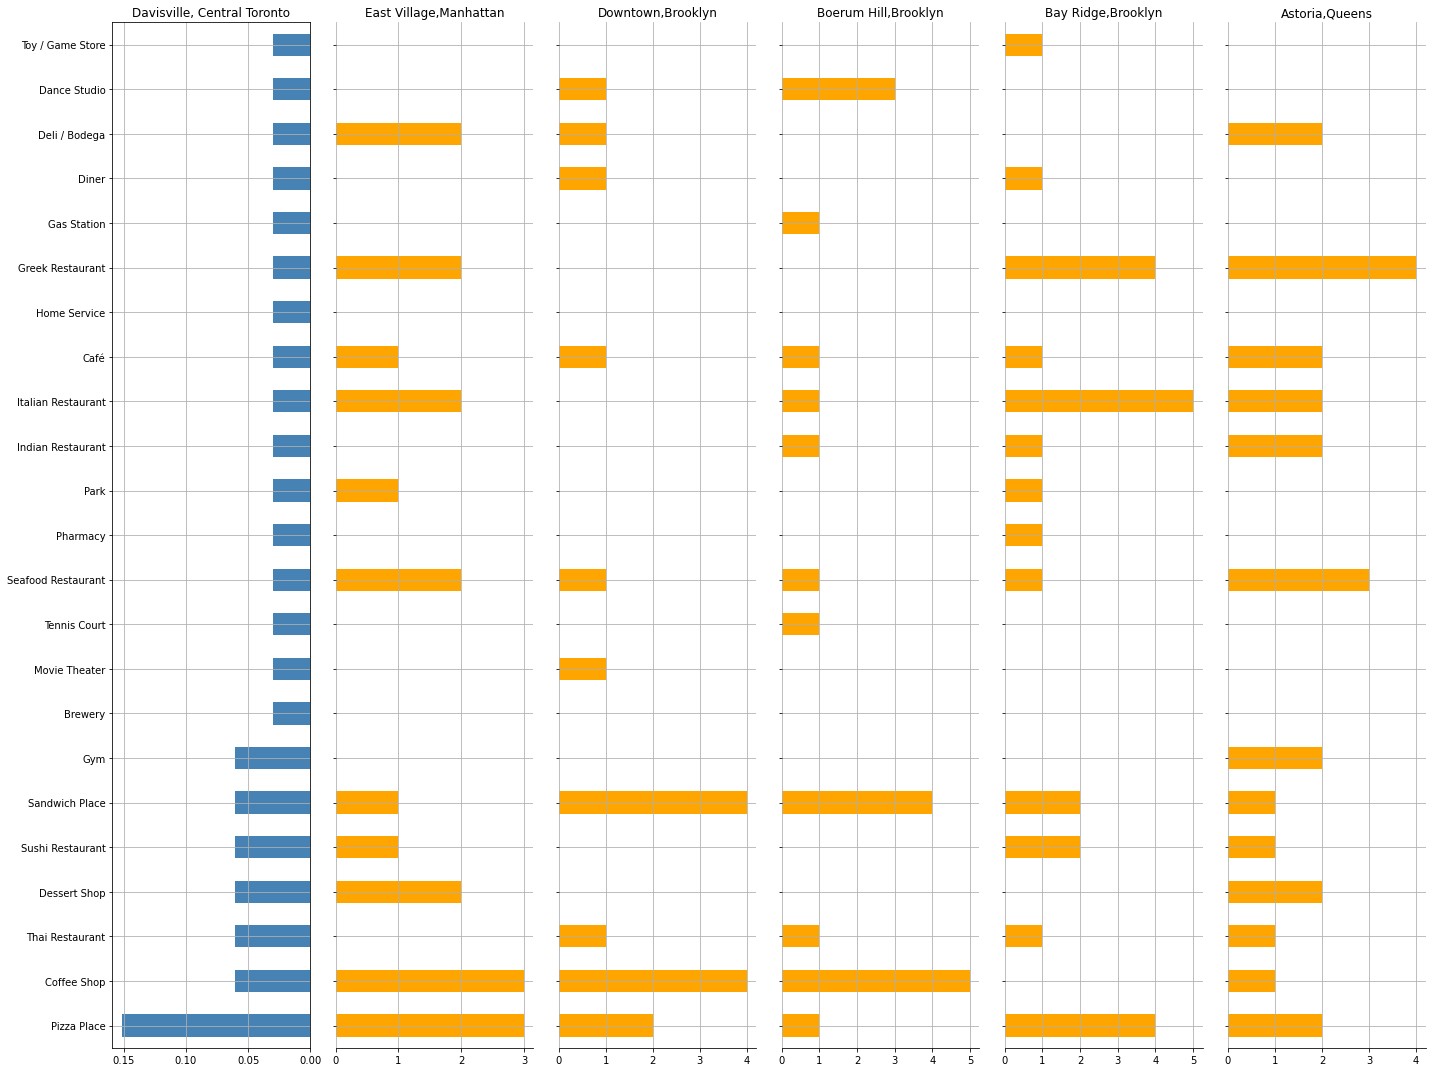

In [78]:
most_similar_borough('Toronto','Central Toronto','Davisville',5)